In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
Progression = pd.read_csv("C:/Users/melod/Desktop/RongRong/Dry/WGCNA/Pro_Re/Pro_top2000_matrix.csv" , index_col = 0)
Regression = pd.read_csv("C:/Users/melod/Desktop/RongRong/Dry/WGCNA/Pro_Re/Re_top2000_matrix.csv" , index_col = 0)

In [3]:
#Get the intersect between df
genes = list(set(Progression.index) & set(Regression.index))

In [21]:
Progression_inter = Progression.loc[genes].T
Progression_inter["condition"] = 0

In [22]:
Regression_inter = Regression.loc[genes].T
Regression_inter["condition"] = 1

In [23]:
data_inter_all = pd.concat([Progression_inter , Regression_inter])

In [24]:
data_inter_all.head()

,Atf3,Mt2,Cxcl14,Kntc1,Irf4,Fstl1,F10,Flna,C3,Mmp14,...,P2ry10,Ptma,Kcnq1,Cacna1d,Ccl3,Trem1,Gnb1l,Stmn4,Rapgef5,condition
AAACCTGCAAACTGCT.1,2.486007,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0
AAACCTGCAAGCGAGT.1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,2.799237,0.0,0.0,2.165166,0.000000,0.0,0.0,0.0,0
AAACCTGCACGGTGTC.1,1.191177,2.690952,0.0,0.0,0.0,0.0,0.0,1.719529,0.0,0.0,...,0.0,2.690952,0.0,0.0,2.063420,1.719529,0.0,0.0,0.0,0
AAACCTGCAGCGAACA.1,0.000000,1.591755,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,2.544518,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0
AAACCTGGTAGCACGA.1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,3.868976,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0


Random Forest

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report , confusion_matrix

In [26]:
X = data_inter_all.loc[:,data_inter_all.columns[:-1]]
y = data_inter_all['condition']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [28]:
rfc = RandomForestClassifier(n_estimators = 200 , random_state = 0)

In [29]:
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [30]:
print(confusion_matrix(y_test , y_pred))
print('\n')
print(classification_report(y_test , y_pred))

[[930  45]
 [190 519]]


              precision    recall  f1-score   support

           0       0.83      0.95      0.89       975
           1       0.92      0.73      0.82       709

    accuracy                           0.86      1684
   macro avg       0.88      0.84      0.85      1684
weighted avg       0.87      0.86      0.86      1684



In [31]:
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

In [32]:
feature_scores_top40 = feature_scores.loc[feature_scores.index[:40]]

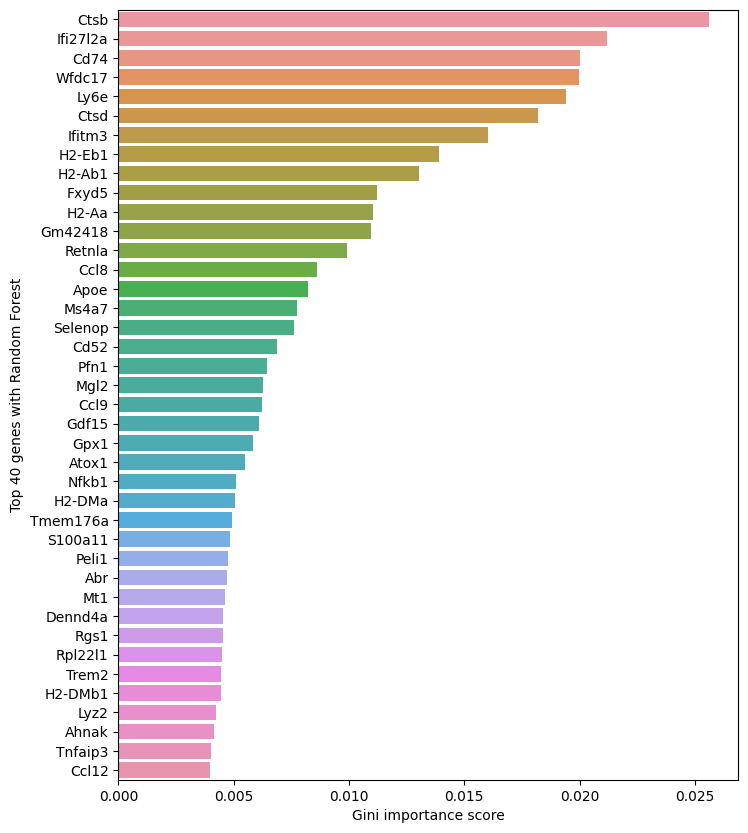

In [33]:
f, ax = plt.subplots(figsize=(8, 10))
ax = sns.barplot(x=feature_scores_top40, y=feature_scores_top40.index)
ax.set_yticklabels(feature_scores_top40.index)
ax.set_xlabel("Gini importance score")
ax.set_ylabel("Top 40 genes with Random Forest")
plt.show()

In [34]:
from sklearn.metrics import roc_curve, auc

In [35]:
y_score1 = rfc.predict_proba(X_test)[:, 1]

In [36]:
fpr1, tpr1, _ = roc_curve(y_test, y_score1)
roc_auc1 = auc(fpr1, tpr1)

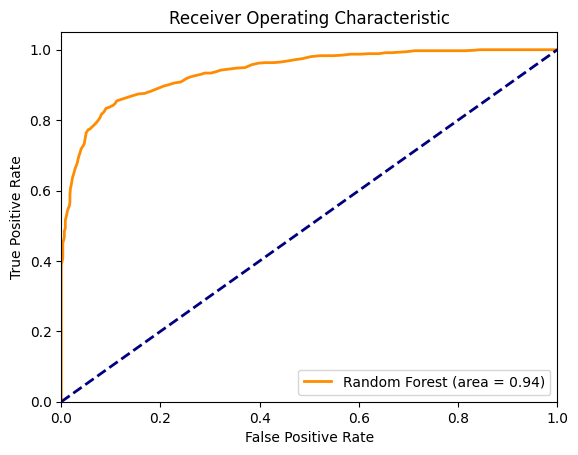

In [37]:
plt.figure()
lw = 2
plt.plot(fpr1, tpr1, color='darkorange', lw=lw, label='Random Forest (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()